In [1]:
import os
os.chdir('../../')

In [2]:
cd = os.getcwd()
functions_path = os.path.join(cd, '02_code/functions')

In [3]:
#import required packages

import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import anndata as ad
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix

import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

# from scipy.sparse import csr_matrix
import sys
sys.path.append(functions_path)
import functions_dat_processing as dp

/tmp/ipykernel_2409089/1030767214.py:18: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [61]:
#install required R packages from Bioconductor (install the rest with mamba install r-package in the virtual environment, but that does not work for Bioconductor)
bioc = ro.packages.importr('BiocManager') 
bioc.install('scran')
bioc.install('BiocParallel')
bioc.install('scry')

* installing *source* package ‘glmpca’ ...
** Paket ‘glmpca’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (glmpca)
* installing *source* package ‘scry’ ...
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (scry)


Update all/some/none? [a/s/n]: 

* installing *source* package ‘abind’ ...
** Paket ‘abind’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (abind)
* installing *source* package ‘bit’ ...
** Paket ‘bit’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.1.0-0) 14.1.0’


x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c attrutil.c -o attrutil.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -ma

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-bit/00new/bit/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (bit)
* installing *source* package ‘curl’ ...
** Paket ‘curl’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation


Found pkg-config cflags and libs!
Using PKG_CFLAGS=-I/usr/include/x86_64-linux-gnu
Using PKG_LIBS=-lcurl
--------------------------- [ANTICONF] --------------------------------
Configuration failed because libcurl was not found. Try installing:
 * deb: libcurl4-openssl-dev (Debian, Ubuntu, etc)
 * rpm: libcurl-devel (Fedora, CentOS, RHEL)
If libcurl is already installed, check that 'pkg-config' is in your
PATH and PKG_CONFIG_PATH contains a libcurl.pc file. If pkg-config
is unavailable you can set INCLUDE_DIR and LIB_DIR manually via:
R CMD INSTALL --configure-vars='INCLUDE_DIR=... LIB_DIR=...'
-------------------------- [ERROR MESSAGE] ---------------------------
In file included from /home/s377963/mambaforge/envs/scanpy/x86_64-conda-linux-gnu/sysroot/usr/include/features.h:375,
                 from /usr/include/x86_64-linux-gnu/sys/types.h:25,
                 from /usr/include/x86_64-linux-gnu/curl/system.h:430,
                 from /usr/include/x86_64-linux-gnu/curl/curl.h:35,
  

ERROR: configuration failed for package ‘curl’
* removing ‘/home/s377963/mambaforge/envs/scanpy/lib/R/library/curl’
* restoring previous ‘/home/s377963/mambaforge/envs/scanpy/lib/R/library/curl’
* installing *source* package ‘evaluate’ ...
** Paket ‘evaluate’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (evaluate)
* installing *source* package ‘FNN’ ...
** Paket ‘FNN’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.1.0-0) 14.1.0’
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (conda-forge gcc 14.1.0-0) 14.1.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG -Iinclude -DUSING_R -DUSING_RPRINT  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c ANN.cpp -o ANN.o
x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG -Iinclude -DUSING_R -DUSING_RPRINT  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/e

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-FNN/00new/FNN/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (FNN)
* installing *source* package ‘ggrepel’ ...
** Paket ‘ggrepel’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** libs
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (conda-forge gcc 14.1.0-0) 14.1.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG  -I'/home/s377963/mambaforge/envs/scanpy/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c RcppExports.cpp -o RcppExports.o
x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG  -I'/home/s377963/mambaforge/envs/scanpy/lib/R/library/

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-ggrepel/00new/ggrepel/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggrepel)
* installing *source* package ‘glue’ ...
** Paket ‘glue’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.1.0-0) 14.1.0’


x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib   -fvisibility=hidden -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c glue.c -o glue.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib   

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-glue/00new/glue/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (glue)
* installing *source* package ‘jsonlite’ ...
** Paket ‘jsonlite’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.1.0-0) 14.1.0’


x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG -Iyajl/api  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib   -fvisibility=hidden  -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c base64.c -o base64.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG -Iyajl/api  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mamb

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-jsonlite/00new/jsonlite/libs
** R
** inst
** byte-compile and prepare package for lazy loading


in Methode ‘asJSON’ für Signatur ‘"AsIs"’: keine Definition der Klasse “AsIs”
in Methode ‘asJSON’ für Signatur ‘"ITime"’: keine Definition der Klasse “ITime”
in Methode ‘asJSON’ für Signatur ‘"hms"’: keine Definition der Klasse “hms”
in Methode ‘asJSON’ für Signatur ‘"json"’: keine Definition der Klasse “json”
in Methode ‘asJSON’ für Signatur ‘"integer64"’: keine Definition der Klasse “integer64”
in Methode ‘asJSON’ für Signatur ‘"pairlist"’: keine Definition der Klasse “pairlist”
in Methode ‘asJSON’ für Signatur ‘"blob"’: keine Definition der Klasse “blob”
in Methode ‘asJSON’ für Signatur ‘"scalar"’: keine Definition der Klasse “scalar”
in Methode ‘asJSON’ für Signatur ‘"sf"’: keine Definition der Klasse “sf”
in Methode ‘asJSON’ für Signatur ‘"sfc"’: keine Definition der Klasse “sfc”
in Methode ‘asJSON’ für Signatur ‘"vctrs_vctr"’: keine Definition der Klasse “vctrs_vctr”


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (jsonlite)
ERROR: failed to lock directory ‘/home/s377963/mambaforge/envs/scanpy/lib/R/library’ for modifying
Try removing ‘/home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-matrixStats’
* installing *source* package ‘openssl’ ...
** Paket ‘openssl’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation


Found pkg-config cflags and libs!
Using PKG_CFLAGS=
Using PKG_LIBS=-lssl -lcrypto


src/tests/soname.h:1:10: fatal error: openssl/opensslv.h: No such file or directory
    1 | #include "openssl/opensslv.h"
      |          ^~~~~~~~~~~~~~~~~~~~
compilation terminated.
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.1.0-0) 14.1.0’


rm -f aes.o base64.o bignum.o cert.o compatibility.o diffie.o envelope.o error.o hash.o info.o keygen.o keys.o onload.o openssh.o password.o pbkdf.o pem.o pkcs12.o pkcs7.o rand.o rsa.o signing.o ssl.o stream.o write.o x25519.o openssl.so bcrypt/libstatbcrypt.a bcrypt/bcrypt_pbkdf.o bcrypt/blowfish.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c aes.c -o aes.o
x86_6

keygen.c: In function 'R_keygen_dsa':
keygen.c:36:3: warning: 'DSA_new' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   36 |   DSA *dsa = DSA_new();
      |   ^~~
In file included from keygen.c:6:
/home/s377963/mambaforge/envs/scanpy/include/openssl/dsa.h:130:28: note: declared here
  130 | OSSL_DEPRECATEDIN_3_0 DSA *DSA_new(void);
      |                            ^~~~~~~
keygen.c:37:3: warning: 'DSA_generate_parameters_ex' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   37 |   bail(DSA_generate_parameters_ex(dsa, asInteger(bits), NULL, 0, NULL, NULL, NULL));
      |   ^~~~
/home/s377963/mambaforge/envs/scanpy/include/openssl/dsa.h:172:27: note: declared here
  172 | OSSL_DEPRECATEDIN_3_0 int DSA_generate_parameters_ex(DSA *dsa, int bits,
      |                           ^~~~~~~~~~~~~~~~~~~~~~~~~~
keygen.c:38:3: warning: 'DSA_generate_key' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   38 |   bail(DSA_generate_key(dsa));
      |   ^~~

x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c keys.c -o keys.o


keys.c: In function 'R_pubkey_bitsize':
keys.c:140:5: warning: 'RSA_get0_key' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
  140 |     MY_RSA_get0_key(EVP_PKEY_get1_RSA(pkey), &val, NULL, NULL);
      |     ^~~~~~~~~~~~~~~
In file included from /home/s377963/mambaforge/envs/scanpy/include/openssl/x509.h:36,
                 from /home/s377963/mambaforge/envs/scanpy/include/openssl/pem.h:23,
                 from keys.c:5:
/home/s377963/mambaforge/envs/scanpy/include/openssl/rsa.h:228:28: note: declared here
  228 | OSSL_DEPRECATEDIN_3_0 void RSA_get0_key(const RSA *r,
      |                            ^~~~~~~~~~~~
keys.c:140:5: warning: 'EVP_PKEY_get1_RSA' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
  140 |     MY_RSA_get0_key(EVP_PKEY_get1_RSA(pkey), &val, NULL, NULL);
      |     ^~~~~~~~~~~~~~~
In file included from /home/s377963/mambaforge/envs/scanpy/include/openssl/pem.h:22:
/home/s377963/mambaforge/envs/scanpy/include/openssl/evp.h:1358:16: note

x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c onload.c -o onload.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=

openssh.c: In function 'R_rsa_pubkey_build':
openssh.c:42:3: warning: 'RSA_new' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   42 |   RSA *rsa = RSA_new();
      |   ^~~
In file included from /home/s377963/mambaforge/envs/scanpy/include/openssl/x509.h:36,
                 from /home/s377963/mambaforge/envs/scanpy/include/openssl/pem.h:23,
                 from openssh.c:4:
/home/s377963/mambaforge/envs/scanpy/include/openssl/rsa.h:212:28: note: declared here
  212 | OSSL_DEPRECATEDIN_3_0 RSA *RSA_new(void);
      |                            ^~~~~~~
openssh.c:43:3: warning: 'RSA_set0_key' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   43 |   MY_RSA_set0_key(rsa, new_bignum_from_r(moddata), new_bignum_from_r(expdata), NULL);
      |   ^~~~~~~~~~~~~~~
/home/s377963/mambaforge/envs/scanpy/include/openssl/rsa.h:218:27: note: declared here
  218 | OSSL_DEPRECATEDIN_3_0 int RSA_set0_key(RSA *r, BIGNUM *n, BIGNUM *e, BIGNUM *d);
      |                       

x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c password.c -o password.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -ma

pem.c: In function 'R_parse_pem_pubkey_pkcs1':
pem.c:85:3: warning: 'PEM_read_bio_RSAPublicKey' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   85 |   RSA *rsa = PEM_read_bio_RSAPublicKey(mem, NULL, password_cb, NULL);
      |   ^~~
In file included from pem.c:5:
/home/s377963/mambaforge/envs/scanpy/include/openssl/pem.h:452:1: note: declared here
  452 | DECLARE_PEM_rw_attr(OSSL_DEPRECATEDIN_3_0, RSAPublicKey, RSA)
      | ^~~~~~~~~~~~~~~~~~~
pem.c:88:3: warning: 'i2d_RSA_PUBKEY' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   88 |   int len = i2d_RSA_PUBKEY(rsa, &buf);
      |   ^~~
In file included from /home/s377963/mambaforge/envs/scanpy/include/openssl/objects.h:21,
                 from /home/s377963/mambaforge/envs/scanpy/include/openssl/evp.h:44,
                 from /home/s377963/mambaforge/envs/scanpy/include/openssl/pem.h:22:
/home/s377963/mambaforge/envs/scanpy/include/openssl/x509.h:717:1: note: declared here
  717 | DECLARE_ASN1_ENCODE_FU

x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c pkcs12.c -o pkcs12.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=

rsa.c: In function 'R_rsa_encrypt':
rsa.c:10:3: warning: 'd2i_RSA_PUBKEY' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   10 |   RSA *rsa = d2i_RSA_PUBKEY(NULL, &ptr, LENGTH(keydata));
      |   ^~~
In file included from /home/s377963/mambaforge/envs/scanpy/include/openssl/objects.h:21,
                 from /home/s377963/mambaforge/envs/scanpy/include/openssl/evp.h:44,
                 from /home/s377963/mambaforge/envs/scanpy/include/openssl/pem.h:22,
                 from rsa.c:5:
/home/s377963/mambaforge/envs/scanpy/include/openssl/x509.h:717:1: note: declared here
  717 | DECLARE_ASN1_ENCODE_FUNCTIONS_only_attr(OSSL_DEPRECATEDIN_3_0,RSA, RSA_PUBKEY)
      | ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rsa.c:13:3: warning: 'RSA_size' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   13 |   int keysize = RSA_size(rsa);
      |   ^~~
In file included from /home/s377963/mambaforge/envs/scanpy/include/openssl/x509.h:36,
                 from /home/s377963/mamba

x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c signing.c -o signing.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -marc

stream.c: In function 'fin_hmac':
stream.c:59:3: warning: 'HMAC_CTX_free' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   59 |   HMAC_CTX_free(R_ExternalPtrAddr(ptr));
      |   ^~~~~~~~~~~~~
In file included from stream.c:5:
/home/s377963/mambaforge/envs/scanpy/include/openssl/hmac.h:35:28: note: declared here
   35 | OSSL_DEPRECATEDIN_3_0 void HMAC_CTX_free(HMAC_CTX *ctx);
      |                            ^~~~~~~~~~~~~
stream.c: In function 'R_hmac_init':
stream.c:76:3: warning: 'HMAC_CTX_new' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   76 |   HMAC_CTX* ctx = HMAC_CTX_new();
      |   ^~~~~~~~
/home/s377963/mambaforge/envs/scanpy/include/openssl/hmac.h:33:33: note: declared here
   33 | OSSL_DEPRECATEDIN_3_0 HMAC_CTX *HMAC_CTX_new(void);
      |                                 ^~~~~~~~~~~~
stream.c:81:3: warning: 'HMAC_Init_ex' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   81 |   bail(HMAC_Init_ex(ctx, RAW(key), LENGTH(key), md,

x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c write.c -o write.o


write.c: In function 'R_pem_write_pkcs1_privkey':
write.c:39:5: warning: 'EVP_PKEY_get0_RSA' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   39 |     RSA *rsa = (RSA*) MY_EVP_PKEY_get0_RSA(pkey);
      |     ^~~
In file included from /home/s377963/mambaforge/envs/scanpy/include/openssl/pem.h:22,
                 from write.c:2:
/home/s377963/mambaforge/envs/scanpy/include/openssl/evp.h:1356:22: note: declared here
 1356 | const struct rsa_st *EVP_PKEY_get0_RSA(const EVP_PKEY *pkey);
      |                      ^~~~~~~~~~~~~~~~~
write.c:41:7: warning: 'PEM_write_bio_RSAPrivateKey' is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   41 |       bail(PEM_write_bio_RSAPrivateKey(out, rsa, EVP_des_ede3_cbc(), NULL, 0, NULL, pass));
      |       ^~~~
/home/s377963/mambaforge/envs/scanpy/include/openssl/pem.h:451:1: note: declared here
  451 | DECLARE_PEM_rw_cb_attr(OSSL_DEPRECATEDIN_3_0, RSAPrivateKey, RSA)
      | ^~~~~~~~~~~~~~~~~~~~~~
write.c:43:7: warning: 'P

x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c x25519.c -o x25519.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-openssl/00new/openssl/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (openssl)
* installing *source* package ‘patchwork’ ...
** Paket ‘patchwork’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final locati

checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C++... yes
checking whether x86_64-conda-linux-gnu-c++ -std=gnu++17 accepts -g... yes
checking for x86_64-conda-linux-gnu-c++ -std=gnu++17 option to enable C++11 features... none needed
checking how to run the C++ preprocessor... x86_64-conda-linux-gnu-c++ -std=gnu++17 -E
checking whether the compiler supports GNU C++... (cached) yes
checking whether x86_64-conda-linux-gnu-c++ -std=gnu++17 accepts -g... (cached) yes
checking for x86_64-conda-linux-gnu-c++ -std=gnu++17 option to enable C++11 features... (cached) none needed
checking whether we have a suitable tempdir... /tmp
checking whether R CMD SHLIB can already compile programs using OpenMP... yes
checking LAPACK_LIBS... system LAPACK found
configure: creating .

** libs
using C++ compiler: ‘x86_64-conda-linux-gnu-c++ (conda-forge gcc 14.1.0-0) 14.1.0’


x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG -I../inst/include -I'/home/s377963/mambaforge/envs/scanpy/lib/R/library/Rcpp/include' -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib   -fopenmp -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c RcppArmadillo.cpp -o RcppArmadillo.o
x86_64-conda-linux-gnu-c++ -std=gnu++17 -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG -I../inst/include -I'/home

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-RcppArmadillo/00new/RcppArmadillo/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (RcppArmadillo)
ERROR: failed to lock directory ‘/home/s377963/mambaforge/envs/scanpy/lib/R/library’ for modifying
Try removing ‘/home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-spatstat.geom’
* installing *source* package ‘tinytex’ ...
** Paket ‘tinytex’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** bu

x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG -I../inst/include/  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c bbox-handler.c -o bbox-handler.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG -I../inst/include/  -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-wk/00new/wk/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (wk)
* installing *source* package ‘bit64’ ...
** Paket ‘bit64’ erfolgreich entpackt und MD5 Summen überprüft
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 14.1.0-0) 14.1.0’


x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/s377963/mambaforge/envs/scanpy/include -fdebug-prefix-map=/home/conda/feedstock_root/build_artifacts/r-base-split_1723488709275/work=/usr/local/src/conda/r-base-4.3.3 -fdebug-prefix-map=/home/s377963/mambaforge/envs/scanpy=/usr/local/src/conda-prefix  -c bsearch.c -o bsearch.o
x86_64-conda-linux-gnu-cc -I"/home/s377963/mambaforge/envs/scanpy/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/s377963/mambaforge/envs/scanpy/include -I/home/s377963/mambaforge/envs/scanpy/include -Wl,-rpath-link,/home/s377963/mambaforge/envs/scanpy/lib    -fpic  -marc

installing to /home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-bit64/00new/bit64/libs
** R
** data
** exec
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (bit64)
ERROR: failed to lock directory ‘/home/s377963/mambaforge/envs/scanpy/lib/R/library’ for modifying
Try removing ‘/home/s377963/mambaforge/envs/scanpy/lib/R/library/00LOCK-spatstat.random’


array(['scry'], dtype='<U4')

In [4]:
#import required R packages
# seurat = ro.packages.importr('Seurat')
soupx = ro.packages.importr('SoupX') 
scran = ro.packages.importr('scran') 
bcp = ro.packages.importr('BiocParallel') 
scry = ro.packages.importr('scry')


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [42]:
import importlib
importlib.reload(dp)

<module 'functions_dat_processing' from '/home/s377963/car_t_sc/02_code/functions/functions_dat_processing.py'>

In [5]:
#import data from cellranger
adata = sc.read_10x_mtx("./01_data/raw/cellranger_multi/2024-06-07_24054SC_Luu_P1_cellranger/per_sample_outs/count/sample_filtered_feature_bc_matrix", gex_only=False)
adata_raw = sc.read_10x_mtx("./01_data/raw/cellranger_multi/2024-06-07_24054SC_Luu_P1_cellranger/count/raw_feature_bc_matrix", gex_only=False)

# Quality Control

### 1. Filter for low quality cells / likely dying cells based on mitochondrial counts per cell; total gene count per cell and total counts per cell, in this case mt counts and gene/total counts are considered together, usually people set random threshhholds.

In [6]:
# select the features of interest for quality control, in this case HTOs and mitochondiral features:
#mitochondrial:
adata.var['mt'] = adata.var_names.str.startswith('mt-') #note for mice its mt for human its MT
#ribosomal:
# adata.var['ribo'] = adata.var_names.str.lower().str.startswith(('rpl', 'rps'))
#HTOs
# adata.var['hto'] = adata.var['feature_types'] == 'Antibody Capture'

In [7]:
#calculate the qc metrics, meaning total umi counts, total gene counts etc...
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=[20], inplace=True) #percent_top=None, log1p=False,

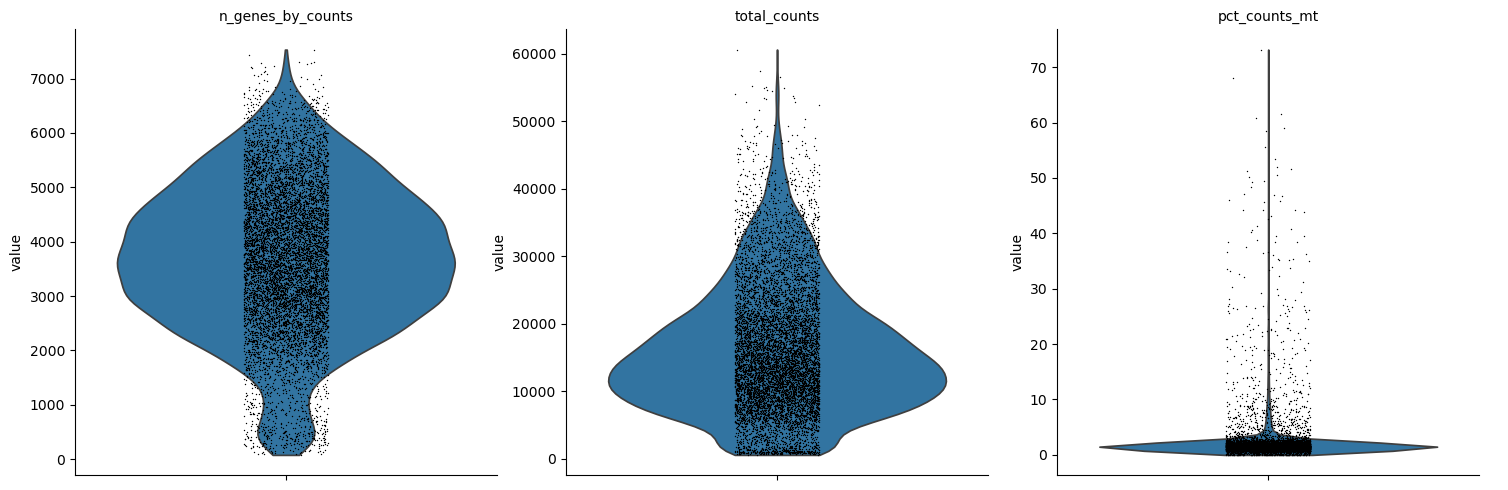

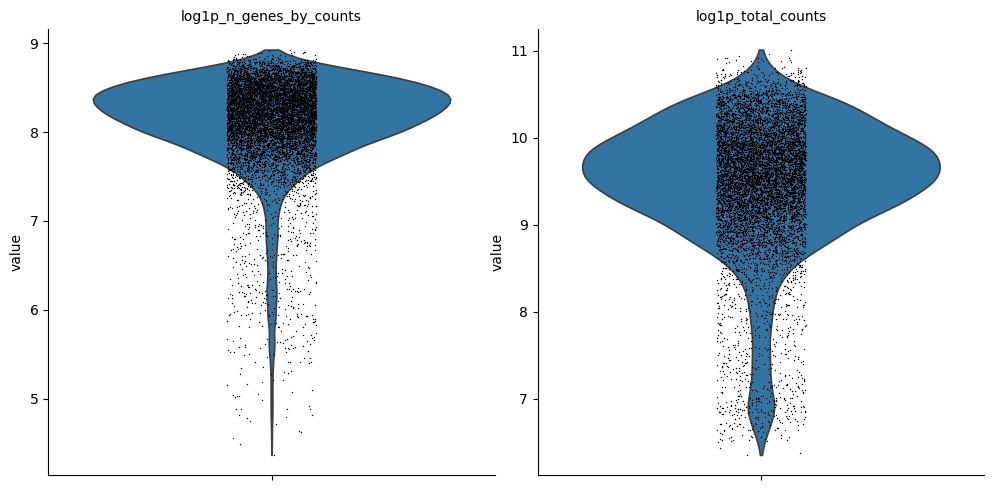

In [8]:
#plot qc metrics, based on this you can decide on what to filter
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], multi_panel=True)
sc.pl.violin(adata, ['log1p_n_genes_by_counts', 'log1p_total_counts'], multi_panel=True)

In [14]:
adata_abs = adata.copy()
sc.pp.filter_cells(adata_abs, min_genes=200)
sc.pp.filter_cells(adata_abs, max_genes=6000)
adata_abs = adata_abs[adata_abs.obs['pct_counts_mt'] < 20, :]

In [19]:
adata_abs

View of AnnData object with n_obs × n_vars = 8535 × 33699
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

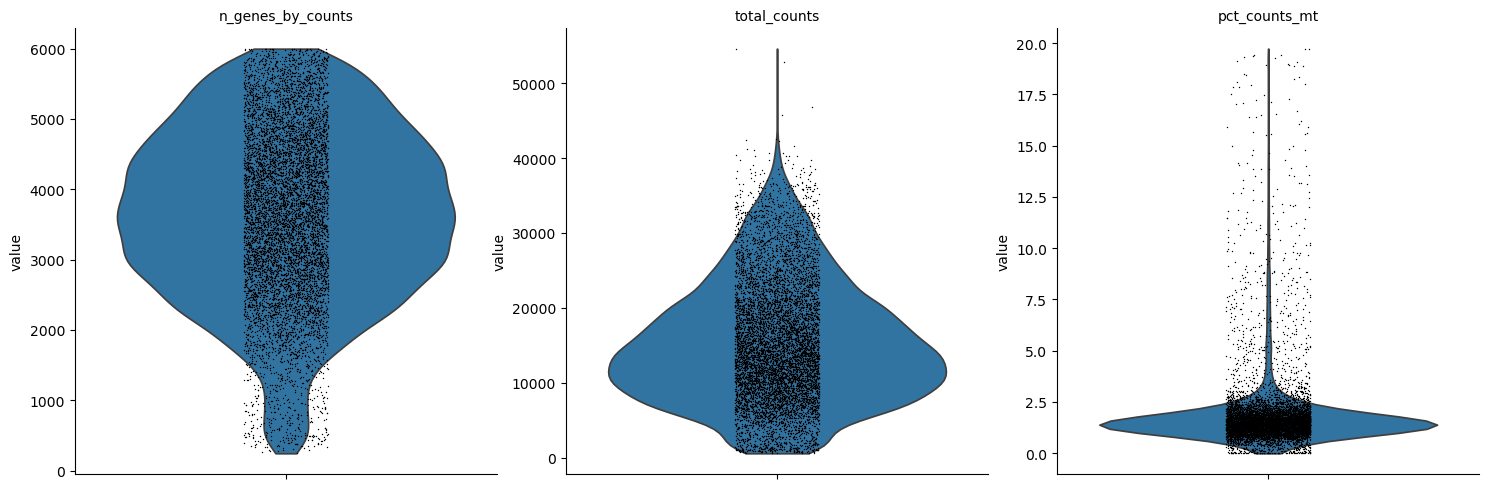

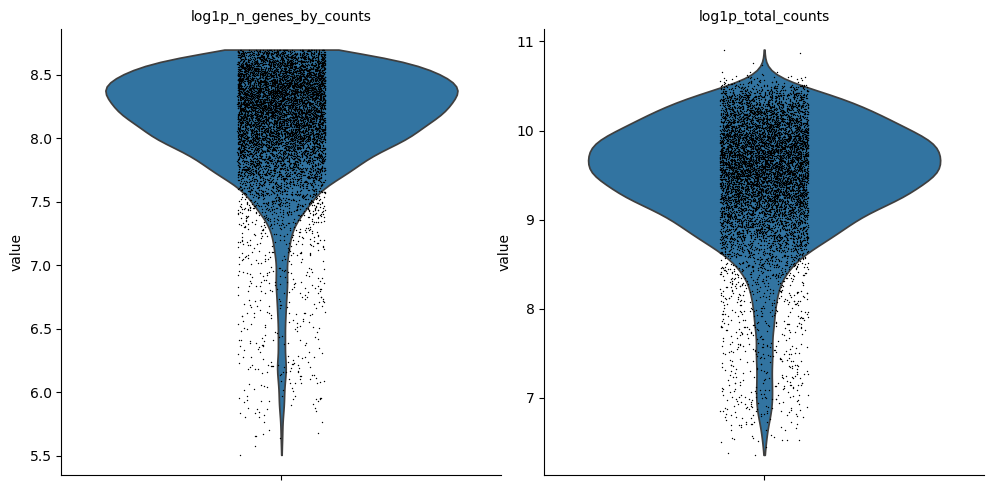

In [15]:
sc.pl.violin(adata_abs, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], multi_panel=True)
sc.pl.violin(adata_abs, ['log1p_n_genes_by_counts', 'log1p_total_counts'], multi_panel=True)

In [49]:
#find outliers in the gene/total counts via MAD
adata.obs["outlier"] = (
    dp.is_mad_outlier(adata, "log1p_total_counts", 5)
    |  dp.is_mad_outlier(adata, "log1p_n_genes_by_counts", 5)
    # |  dp.is_mad_outlier(adata, "pct_counts_in_top_20_genes", 5)
    |  dp.is_mad_outlier(adata, "pct_counts_mt", 20) 
    |  (adata.obs["pct_counts_mt"] > 20)
)
adata.obs.outlier.value_counts()

outlier
False    8581
True      443
Name: count, dtype: int64

In [50]:
adata_mad = adata.copy()
adata_mad = adata_mad[(~adata_mad.obs.outlier), :]
adata_mad

View of AnnData object with n_obs × n_vars = 8581 × 33699
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

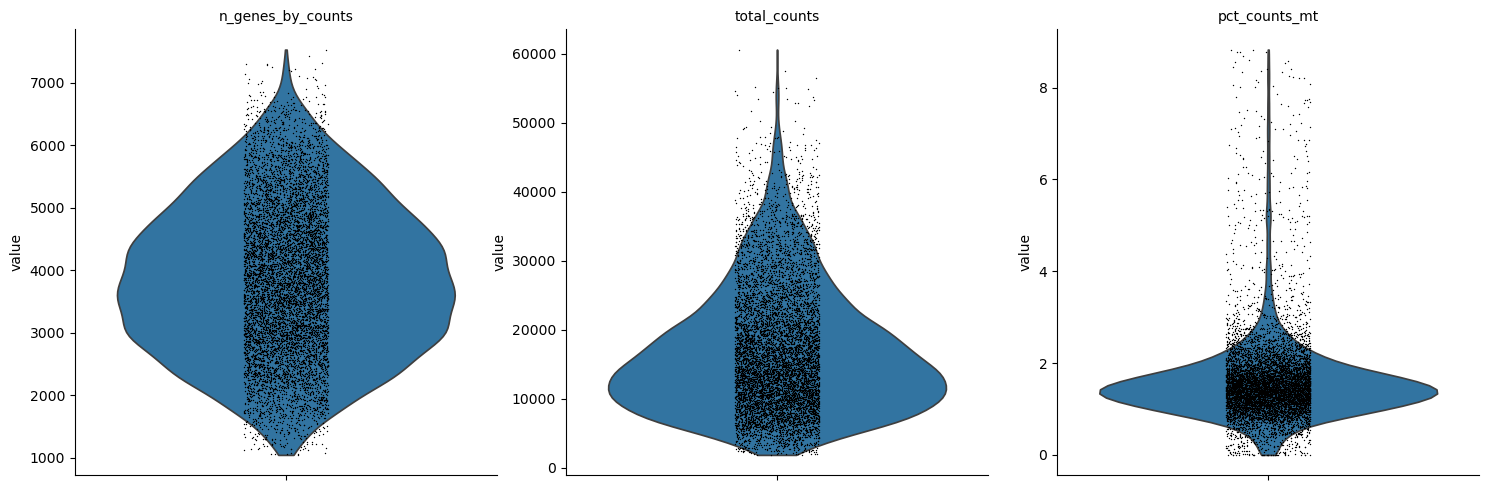

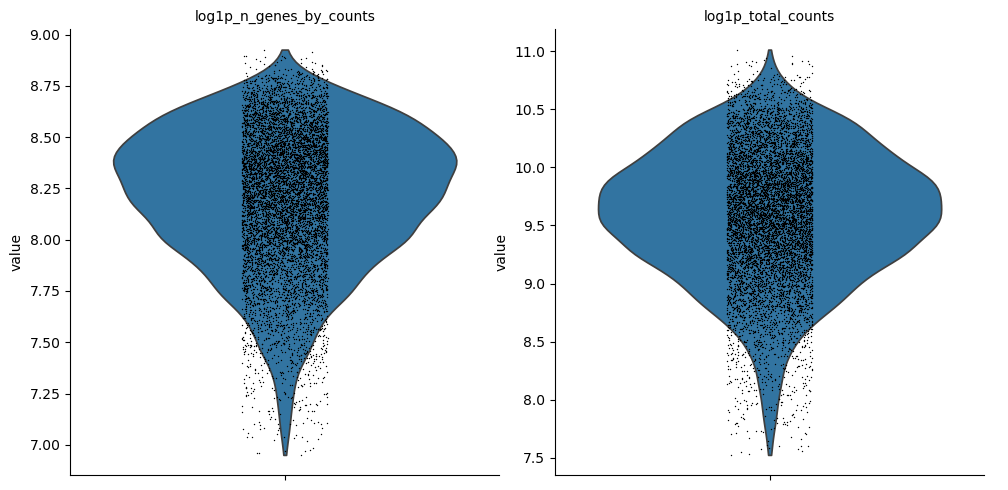

In [51]:
sc.pl.violin(adata_mad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], multi_panel=True)
sc.pl.violin(adata_mad, ['log1p_n_genes_by_counts', 'log1p_total_counts'], multi_panel=True)

In [10]:
adata.obs["outlier"] = (
    dp.is_qntl_outlier(adata, "log1p_total_counts", .01)
    |  dp.is_qntl_outlier(adata, "log1p_n_genes_by_counts", .01)
    |  dp.is_qntl_outlier(adata, "pct_counts_in_top_20_genes", .01)
    |  dp.is_qntl_outlier(adata, "pct_counts_mt", .02)
    |  (adata.obs["pct_counts_mt"] > 5)
)
adata.obs.outlier.value_counts()

outlier
False    8113
True      911
Name: count, dtype: int64

In [11]:
adata_pctl = adata.copy()
adata_pctl = adata_pctl[(~adata_pctl.obs.outlier), :]
adata_pctl

View of AnnData object with n_obs × n_vars = 8113 × 33699
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

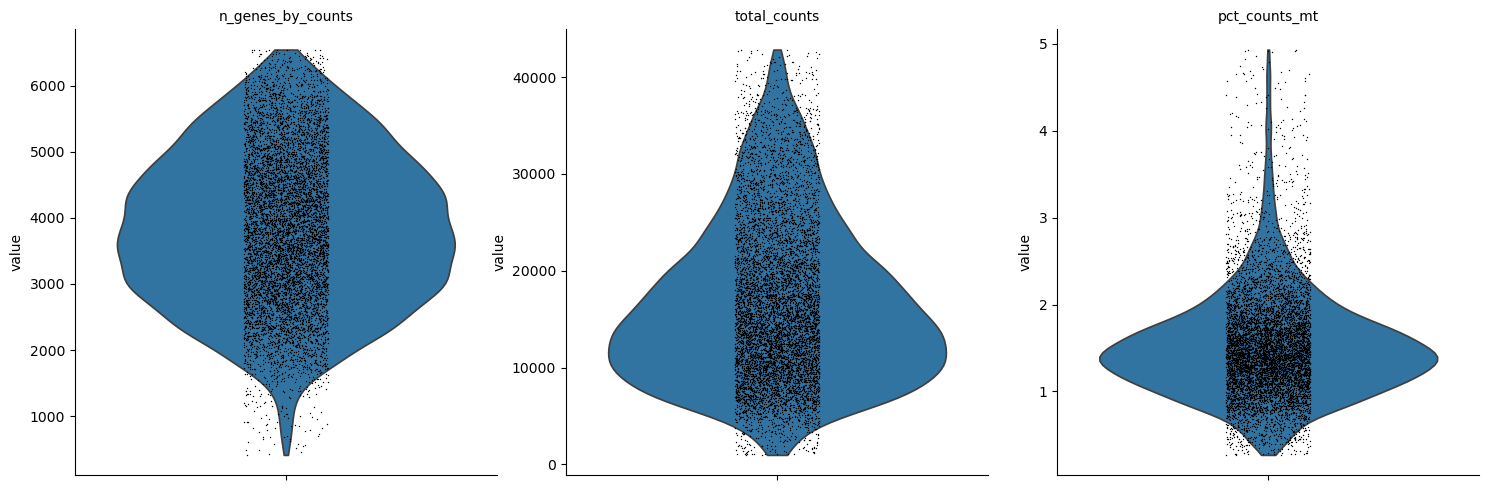

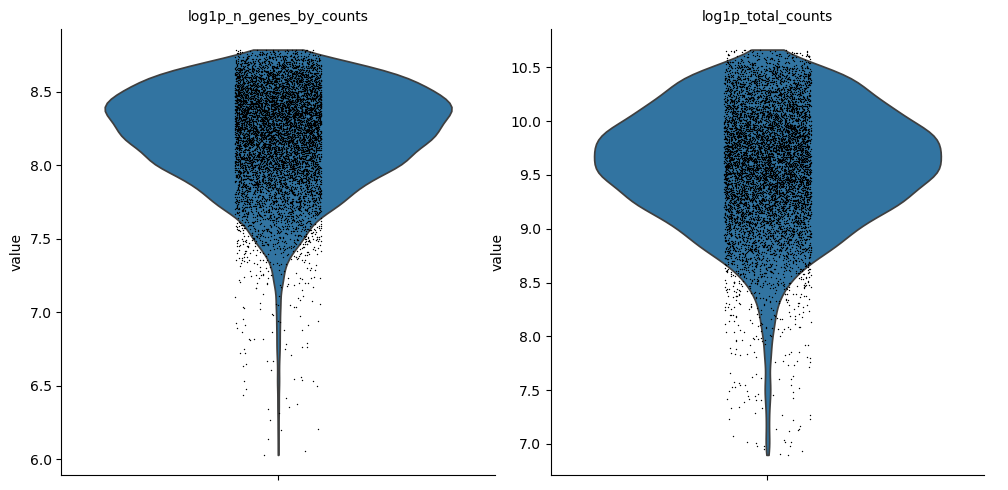

In [37]:
sc.pl.violin(adata_pctl, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], multi_panel=True)
sc.pl.violin(adata_pctl, ['log1p_n_genes_by_counts', 'log1p_total_counts'], multi_panel=True)

In [12]:
#continue with mad filtered adata
adata = adata_mad
del adata_mad; del adata_pctl

### 2. Correct for ambient RNA

In [13]:
#eliminate HTOs from adata (and its raw version), it should not be used for soupx, because its not a real gene. Its considered to be a huge contamination since its added in the lab, hence 
#its not like with other genes that cells burst and those genes therefore appear in some other cells, HTOs appear everywhere and especially in empty droplets. Ergo to avoid eliminating your HTO
#counts and overestimating the contamination fraction we leave them out of ambient RNA corrections.
conditions = list(adata.var[adata.var.feature_types == 'Antibody Capture'].gene_ids)
adata = dp.hashing_columns(adata, rename_to=conditions, rm_var_cols=True) 
adata_raw = dp.hashing_columns(adata_raw, rm_var_cols=True) 

In [14]:
#continue with mad filtered adata
adata_pp = adata.copy()
sc.pp.normalize_total(adata_pp) #normalize with respect to total counts. Each cell will have in the end the same total count in the end.
sc.pp.log1p(adata_pp) #converts the counts into log1p(counts), meaning it computes ln(1 + count)

In [15]:
sc.pp.pca(adata_pp)
sc.pp.neighbors(adata_pp)
sc.tl.leiden(adata_pp, key_added="soupx_groups", flavor="igraph", n_iterations=2)

# # Preprocess variables for SoupX
soupx_groups = adata_pp.obs["soupx_groups"]

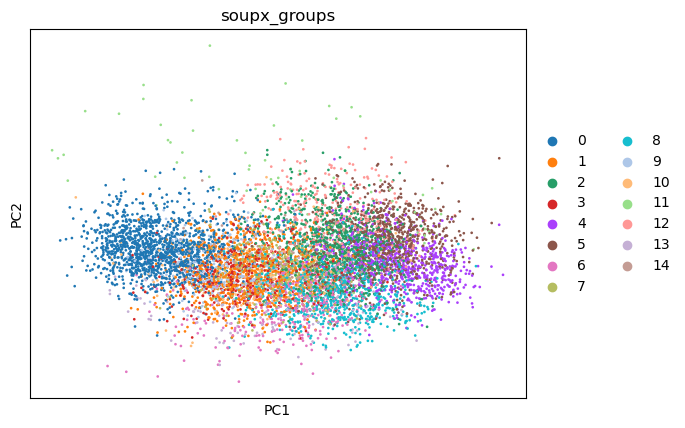

In [23]:
#this gives you the clusters which soupX will use in order to determine marker genes for estimating contamination, In this case I included HTOs
sc.pl.pca(adata_pp, color='soupx_groups')

In [16]:
#In this step, you can manually filter for empty droplets (here defined as all droplets in the raw matrix that have between 0 and 100 counts (dp.find_empty_dops(adata_raw, [0,100])), as recommended by soupX creators)
#this is exactly the same that is done with %R sc = estimateSoup(sc), however this step for some reason does not include genes as rownames, so you'll need to manually set rownames for the soupProfile with:
# %R rownames(sc$soupProfile) <- genes. I think its also more illustrative to use this manual selection step.
empty_drops = dp.find_empty_drops(adata_raw)

In [17]:
#since you cannot transfer the entire adata element to a single cell object in R, you have to split up your data into pieces and put it back together in R
cells = adata.obs_names
genes = adata.var_names
data = adata.X.T
data_raw = adata_raw.X.T

In [18]:
#I am not sure why, but magic %%R does not work, so from now on when using R I will use the %R magic command in each line
%R -i data -i data_raw -i genes -i cells -i soupx_groups -i empty_drops
# specify row and column names of data
%R rownames(data) = genes
%R colnames(data) = cells
# ensure correct sparse format for table of counts and table of droplets
%R data <- as(data, "sparseMatrix")
%R data_raw <- as(data_raw, "sparseMatrix")
# Generate SoupChannel Object for SoupX 
%R sc = SoupChannel(data_raw, data, calcSoupProfile = FALSE) #technically you do not even need the raw data since the empty droplets were computed manually, you may also use 2x data
#based on the empty droplets, create a bakground/soup gene expression profile
%R soupProf = data.frame(row.names = genes, est = rowSums(empty_drops)/sum(empty_drops), counts = rowSums(empty_drops))
%R sc = setSoupProfile(sc, soupProf)
# Set cluster information in SoupChannel
%R sc = setClusters(sc, soupx_groups)
# Estimate contamination fraction
%R sc  = autoEstCont(sc, doPlot=FALSE)
# Infer corrected table of counts and rount to integer
%R out = adjustCounts(sc, roundToInt = TRUE)
%R -o out

'value'

In [19]:
#This will create 2 layers, the soupX corrected count matrix and the original one. The soupX matrix is corrected for ambient RNA / background
adata.layers["counts"] = adata.X
adata.layers["soupX_counts"] = out.T
adata.X = adata.layers["soupX_counts"]

In [20]:
sc.pp.filter_genes(adata, min_cells=20) #make sure all genes occur in at least 20 cells

### 3. Demultiplex and detect doublets using hashsolo from scanpy (which is based on bayesen statistics, hence needs prior probabilitis, which are based on the fact that the filtering above was carried out)

In [21]:
sce.pp.hashsolo(adata, conditions)

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


In [22]:
#safe progress
adata.write('01_data/processed/qc/p1_qc.h5ad', compression='gzip')

### 4. Normalize the data

In [5]:
#Import the data from before:
adata = ad.read_h5ad('01_data/processed/qc/p1_qc.h5ad')

In [24]:
# Preliminary clustering for differentiated normalisation
adata_pp = adata.copy()
sc.pp.normalize_total(adata_pp)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=15)
sc.pp.neighbors(adata_pp)
sc.tl.leiden(adata_pp, key_added="groups")

/tmp/ipykernel_3695720/2214793430.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_pp, key_added="groups")


In [25]:
#convert into csc matrix if nececarry
dat_mat = dp.convert_to_csc(adata_pp.X.T)
ro.globalenv["dat_mat"] = adata_pp.X.T
ro.globalenv["input_groups"] = adata_pp.obs["groups"]

In [26]:
#load the data into R, use the computeSumFactors from scran to compute the size factors for each cell (deconvolution approach)
#convert into single cell element
%R dat_mat <- SingleCellExperiment(list(counts=dat_mat))
#apply the scran algorithm to compute corrected size factors
%R norm <- computeSumFactors(dat_mat, clusters=input_groups,  min.mean = 0.1, BPPARAM = MulticoreParam()) 
#extract size factors
%R sf <- sizeFactors(norm)
%R -o sf

'value'

In [27]:
#add an additional layer to the data
adata.obs['size_factors'] = sf
scran_norm = adata.X /adata.obs["size_factors"].values[:, None]
adata.layers["scran_normalization"] = csr_matrix(sc.pp.log1p(scran_norm))

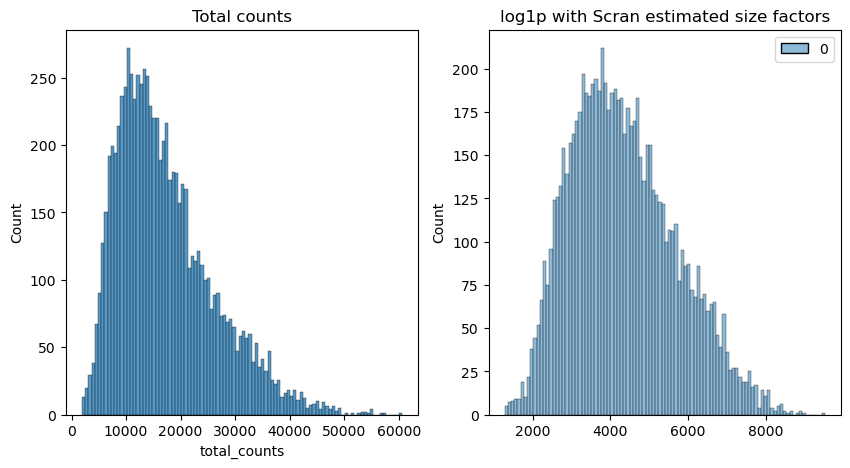

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(
    adata.layers["scran_normalization"].sum(1), bins=100, kde=False, ax=axes[1]
)
axes[1].set_title("log1p with Scran estimated size factors")
plt.show()

In [28]:
#now compare with normal shifted logarithm
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

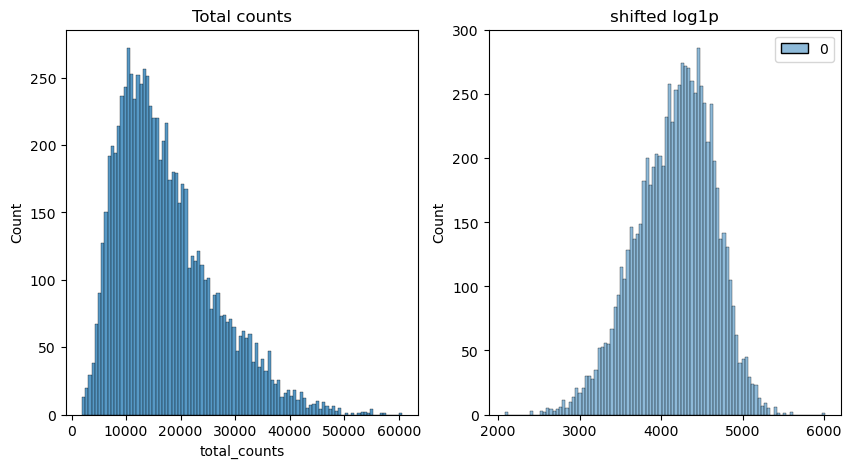

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(
    adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1]
)
axes[1].set_title("shifted log1p")
plt.show()

In [4]:
a = {'tree': 1,
     'bla': 2}
a.items()

dict_items([('tree', 1), ('bla', 2)])

In [29]:
analytic_pearson = sc.experimental.pp.normalize_pearson_residuals(adata, inplace=False)
adata.layers["analytic_pearson_residuals"] = csr_matrix(analytic_pearson["X"])

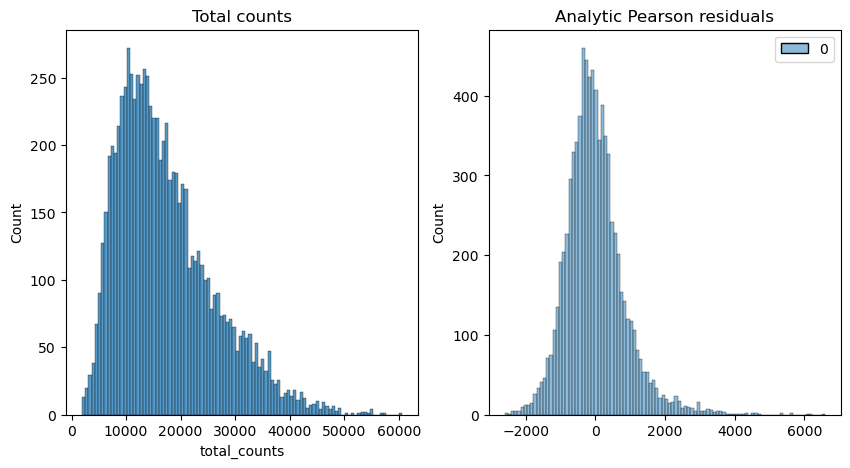

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(
    adata.layers["analytic_pearson_residuals"].sum(1), bins=100, kde=False, ax=axes[1]
)
axes[1].set_title("Analytic Pearson residuals")
plt.show()

In [17]:
#safe progress
adata.write('01_data/processed/qc/p1_qc.h5ad', compression='gzip')

### 5. Inspecting quality control metrics

In [67]:
ro.globalenv["adata"] = adata
%R sce = devianceFeatureSelection(adata, assay="X")
binomial_deviance = ro.r("rowData(sce)$binomial_deviance").T

In [77]:
idx = binomial_deviance.argsort()[-4000:]
mask = np.zeros(adata.var_names.shape, dtype=bool)
mask[idx] = True

adata.var['highly_deviant'] = mask
adata.var['binomial_deviance'] = binomial_deviance

In [78]:
sc.pp.highly_variable_genes(adata, layer="scran_normalization")

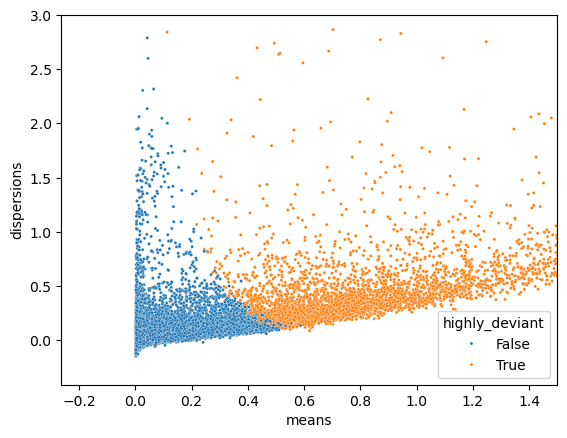

In [79]:
ax = sns.scatterplot(
    data=adata.var, x="means", y="dispersions", hue="highly_deviant", s=5
)
ax.set_xlim(None, 1.5)
ax.set_ylim(None, 3)
plt.show()

In [82]:
adata.layers

Layers with keys: counts, soupX_counts, scran_normalization, log1p_norm, analytic_pearson_residuals

In [111]:
a = [e1 == e2 for e1,e2 in zip(adata.X.toarray(), adata.layers['soupX_counts'].toarray())]
np.array(a).sum() == adata.X.shape[0] * adata.X.shape[1]

True

In [152]:
adata.X = adata.layers['log1p_norm']

In [153]:
adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.pp.pca(adata, svd_solver="arpack") #, mask_var="highly_variable"

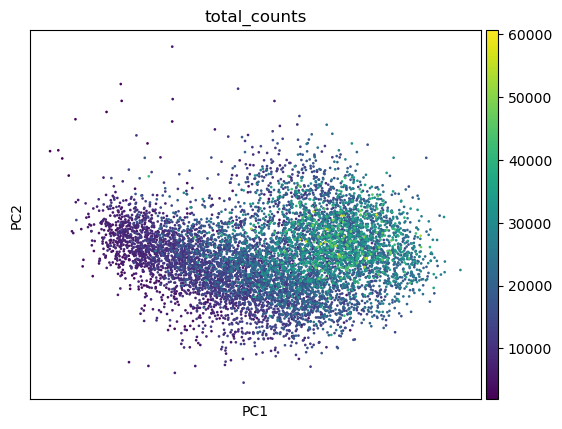

In [154]:
sc.pl.pca_scatter(adata, color="total_counts")

In [155]:
sc.tl.tsne(adata, use_rep="X_pca")

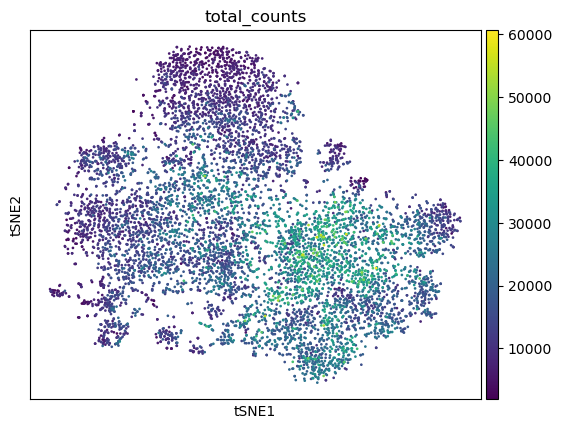

In [157]:
sc.pl.tsne(adata, color="total_counts")

In [158]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

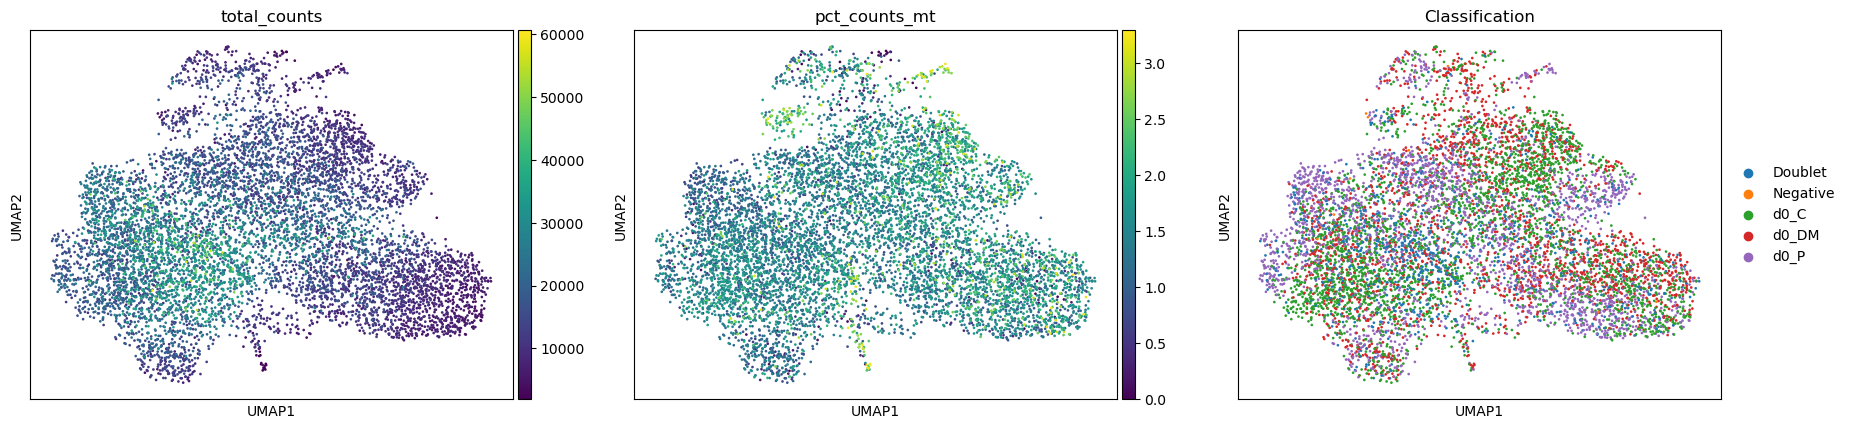

In [159]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt", "Classification"],
)